# Data Science Project: 
## UCI Machine Learning Repository: 
### Default of Credit Card Clients Dataset - Default Payments of Credit Card Clients in Taiwan from 2005
The objective for this project is to conduct data exploration analysis on the dataset and apply eXtreme Gradient Boosting (XGBoost) classification to 
<br>1) Understand the key features/predictors that determines whether an individual will default their credit card bills <br>2) Predicts whether an individual will default on their credit card bills 

In [230]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Stratified Split of train and test data
from sklearn.cross_validation import StratifiedShuffleSplit

### Dataset information
There are <b>25</b> variables:
<br>
<b>ID</b>: ID of each client <br>
<b>LIMIT_BAL</b>: Amount of given credit in NT dollars (includes individual and family/supplementary credit <br>
<b>SEX</b>: Gender (1=male, 2=female) <br>
<b>EDUCATION</b>: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
<b>MARRIAGE</b>: Marital status (1=married, 2=single, 3=others) <br>
<b>AGE</b>: Age in years <br>
<b>PAY_0</b>: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
<b>PAY_2</b>: Repayment status in August, 2005 (scale same as above) <br>
<b>PAY_3</b>: Repayment status in July, 2005 (scale same as above) <br>
<b>PAY_4</b>: Repayment status in June, 2005 (scale same as above) <br>
<b>PAY_5</b>: Repayment status in May, 2005 (scale same as above) <br>
<b>PAY_6</b>: Repayment status in April, 2005 (scale same as above) <br>
<b>BILL_AMT1</b>: Amount of bill statement in September, 2005 (NT dollar) <br>
<b>BILL_AMT2</b>: Amount of bill statement in August, 2005 (NT dollar) <br>
<b>BILL_AMT3</b>: Amount of bill statement in July, 2005 (NT dollar) <br>
<b>BILL_AMT4</b>: Amount of bill statement in June, 2005 (NT dollar) <br>
<b>BILL_AMT5</b>: Amount of bill statement in May, 2005 (NT dollar) <br>
<b>BILL_AMT6</b>: Amount of bill statement in April, 2005 (NT dollar) <br>
<b>PAY_AMT1</b>: Amount of previous payment in September, 2005 (NT dollar) <br>
<b>PAY_AMT2</b>: Amount of previous payment in August, 2005 (NT dollar) <br>
<b>PAY_AMT3</b>: Amount of previous payment in July, 2005 (NT dollar) <br>
<b>PAY_AMT4</b>: Amount of previous payment in June, 2005 (NT dollar) <br>
<b>PAY_AMT5</b>: Amount of previous payment in May, 2005 (NT dollar) <br>
<b>PAY_AMT6</b>: Amount of previous payment in April, 2005 (NT dollar) <br>
<b>default.payment.next.month</b>: Default payment (1=yes, 0=no) <br>

In [231]:
# load in the data and display the top 10 rows
url = './data/default_of_credit_card_clients.csv'
creditcarddata = pd.read_csv(url)
creditcarddata.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [232]:
#Remove the top row header that is irrelevant and set the index
new_header = creditcarddata.iloc[0] #grab the first row for the header using integer loc
creditcarddata = creditcarddata[1:] #take the data less the header row
creditcarddata.columns = new_header #set the header row as the df header
creditcarddata = creditcarddata.set_index('ID') #set the index

#rename the default.payment.next.month to more readable format
creditcarddata = creditcarddata.rename(columns = {'default payment next month':'DEFAULT_FLAG'})
creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [233]:
print ('There are {0} rows and {1} attributes.'.format(creditcarddata.shape[0], creditcarddata.shape[1]))

There are 30000 rows and 24 attributes.


The last column <b>"DEFAULT_FLAG"</b> (1: Default, 0:No Default) will by our response variable (y) and the rest of the 23 variables will by our features/predictors (X). In addition, XGBoost 

In [234]:
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL       30000 non-null object
SEX             30000 non-null object
EDUCATION       30000 non-null object
MARRIAGE        30000 non-null object
AGE             30000 non-null object
PAY_0           30000 non-null object
PAY_2           30000 non-null object
PAY_3           30000 non-null object
PAY_4           30000 non-null object
PAY_5           30000 non-null object
PAY_6           30000 non-null object
BILL_AMT1       30000 non-null object
BILL_AMT2       30000 non-null object
BILL_AMT3       30000 non-null object
BILL_AMT4       30000 non-null object
BILL_AMT5       30000 non-null object
BILL_AMT6       30000 non-null object
PAY_AMT1        30000 non-null object
PAY_AMT2        30000 non-null object
PAY_AMT3        30000 non-null object
PAY_AMT4        30000 non-null object
PAY_AMT5        30000 non-null object
PAY_AMT6        30000 non-null object
DEFAULT_FLAG    30000 

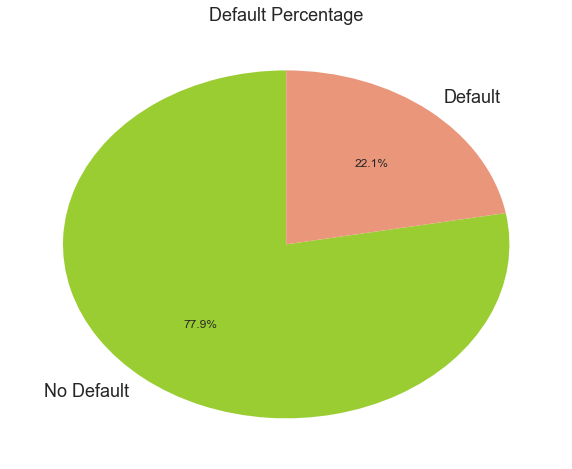

In [235]:
# Show the distribution of the dataset
plt.subplots(figsize=(10, 8))
sizes = creditcarddata['DEFAULT_FLAG'].value_counts().values
patches, texts, autotexts= plt.pie(sizes, labels=['No Default', 'Default'],
                                  colors=['yellowgreen','darksalmon'],
                                  autopct="%1.1f%%", 
                                  startangle=90)

texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
plt.title('Default Percentage', fontsize=18)
plt.show()

Based on the distribution above, clearly the dataset is not very balanced (50/50 split) and is slightly bias towards Defaulting. As per above, close to <b>78%</b> of the dataset have observations with the response variable as '1' as compared <b>22%</b> with response variable as '0'. Apart from that, dataset is relatively clean and suitable for XGBoost classifier as most of the features vector are numeric in nature.

### Dataset preprocessing and cleaning

In [236]:
# Convert column PAY_0 to PAY_1 to conform to dataset info
creditcarddata.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
# Check each individual feature/predictors to see outliers/anomalis values
print 'SEX:' + creditcarddata.SEX.unique()
print 'EDUCATION:' + creditcarddata.EDUCATION.unique()
print 'MARRIAGE:' + creditcarddata.MARRIAGE.unique()
print 'DEFAULT_FLAG:' + creditcarddata.DEFAULT_FLAG.unique()

['SEX:2' 'SEX:1']
['EDUCATION:2' 'EDUCATION:1' 'EDUCATION:3' 'EDUCATION:5' 'EDUCATION:4'
 'EDUCATION:6' 'EDUCATION:0']
['MARRIAGE:1' 'MARRIAGE:2' 'MARRIAGE:3' 'MARRIAGE:0']
['DEFAULT_FLAG:1' 'DEFAULT_FLAG:0']


Based on the above data sanity checks, <b>EDUCATION</b> and <b> MARRIAGE</b> have outlier values that fall outside the defined range as per the dataset info. We will proceed to clean them up. Since the dataset info did have a 'Others' categorical value for both features/predictors, we will encode them to the <b>'Others'</b> bucket.

In [237]:
# EDUCATION - Encode all records with values {0,5,6} to {4}
mapping = {'0':'4','5':'4','6':'4'}
creditcarddata.replace({'EDUCATION': mapping}, inplace=True)
creditcarddata.EDUCATION.unique()

array(['2', '1', '3', '4'], dtype=object)

In [238]:
# MARRIAGE - Encode all records with values {0} to {3}
mapping = {'0':'3'}
creditcarddata.replace({'MARRIAGE': mapping}, inplace=True)
creditcarddata.MARRIAGE.unique()

array(['1', '2', '3'], dtype=object)

In [239]:
# As per documentation, XGBoost only works with numeric vectors. Hence need to convert the entire dataframe to numeric
creditcarddata = creditcarddata.apply(pd.to_numeric, errors='coerce')
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
PAY_1           30000 non-null int64
PAY_2           30000 non-null int64
PAY_3           30000 non-null int64
PAY_4           30000 non-null int64
PAY_5           30000 non-null int64
PAY_6           30000 non-null int64
BILL_AMT1       30000 non-null int64
BILL_AMT2       30000 non-null int64
BILL_AMT3       30000 non-null int64
BILL_AMT4       30000 non-null int64
BILL_AMT5       30000 non-null int64
BILL_AMT6       30000 non-null int64
PAY_AMT1        30000 non-null int64
PAY_AMT2        30000 non-null int64
PAY_AMT3        30000 non-null int64
PAY_AMT4        30000 non-null int64
PAY_AMT5        30000 non-null int64
PAY_AMT6        30000 non-null int64
DEFAULT_FLAG    30000 non-null int64
dtypes: 

In [240]:
#Display the dataset after preprocessing/cleaning
creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


### Setup the XGBoost Model for classification to work

In [241]:
# split data into X (features/predictors) and y (response variable)
X = creditcarddata.iloc[:,0:23] # use integer location to slice the dataset to scope it from feature 1 -23, exclude 24
y = creditcarddata.iloc[:,23:24] # scope it to 24 as the response variable - DEFAULT_FLAG

# split the X and Y data into a training and test dataset to avoid underfitting/overfitting the model 
# The training set will be used to prepare the XGBoost model and the test set will be used to make new predictions
# 70/30 rule to indicate the percentage of the data that should be held over for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print y_train['DEFAULT_FLAG'].value_counts()
print y_test['DEFAULT_FLAG'].value_counts()

# fit the model with the training set
model = XGBClassifier()
model.fit(X_train,y_train)
print model

0    16345
1     4655
Name: DEFAULT_FLAG, dtype: int64
0    7019
1    1981
Name: DEFAULT_FLAG, dtype: int64
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [242]:
# make predictions for test data and round the prediction probabilities.. 
# alternatively, can also apply a threshold that maximises recall/precision/f1 score instead of rounding
y_pred = model.predict(X_test)
# XGBoost outputs probabilities by default and not actual class labels. 
# To calculate accuracy we need to convert these to a 0/1 label by rounding
predictions_binary = [round(value) for value in y_pred]

# model evaluation based on performance measures
accuracy = accuracy_score(y_test, predictions_binary)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('Error Rate: %.2f%%' % (100-(accuracy * 100.0)))

print ('Confusion Matrix:')
print(confusion_matrix(y_test, predictions_binary))
tn, fp, fn, tp = confusion_matrix(y_test, predictions_binary).ravel()

print('Precision:%.2f%%' % ((float(tp)/(tp + fp))* 100.0))
print('Recall: %.2f%%' % (((float(tp)/(tp + fn)))* 100.0))


Accuracy: 82.04%
Error Rate: 17.96%
Confusion Matrix:
[[6675  344]
 [1272  709]]
Precision:67.33%
Recall: 35.79%


Based on the metrics above, we can see that the model has an <b>accuracy rate of 82.04%</b> with an <b>error rate of 17.96%</b>. However, <b>Precision and Recall rate</b> are relatively low - <b>67.33% and 35.79% respectively</b>. Accuracy score alone is not a good enough metric as it doesn't differentiate between false positive and false negative. Based on our objective, we are targetting for <b>High Recall = Fewer False Negative</b>. I.e Fewer number of false predictions that a person actually will default but the model predicts that it will not default/in good credit standing, <b>resulting in huge losses due to bad debts.</b>
<br/>
Another of my thought process is that the dataset given is unbalanced, hence <b>the training/testing set used is highly skewed</b> to one class variable although randomly chosen, leading to <b>underfitting of the model</b>.

### Review and Improve the Performance Metrics

Referencing the report by Jesus Gomez and Jammy Loeur from the Department of Computer Science in California State University whereby their project also worked on the same dataset, I decided to try out 2 strategies that were suggested:

1) Derive new and meaningful features for classification from existing features vector <br/>
2) Apply stratified sampling to dataset to ensure distribution of data splitted between training/testing is proportional/equal across.<br/>
3) Tune the XGBoost model using parameters such as 'max_depth' and 'n_estimators'<br/>
4) Target class rebalancing to ensure that the response variable in 50/50 distribution of default/non-default observations using Upsample/Downsample

#### Derive new and meaningful features for classification - AMT_OWNED_LABELS_NUM (4=None, 3=Low, 2=Medium, 1=High)

In [243]:
# (1)
# As the dataset is highly dimensional/bias, derive more meaningful features based on human knowledge of the real world.
# Create AMT_OWNED feature by taking (SUM(BILL_AMT1..6) - SUM(PAY_AMT1..6)) for each record in the dataset, axis=1 (column_wise)
creditcarddata['AMT_OWNED'] = creditcarddata[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1) - creditcarddata[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis=1)

# To give it more logical meaning, bucket the AMT_OWNED into intervals/binning data
# AMT_OWNED: (NT$0-$1=None, NT$1-$100000=Low, NT$100001-$500000=Medium, >NT$500001=High)
creditcarddata['AMT_OWNED_LABELS'] = pd.cut(creditcarddata.AMT_OWNED, bins=[0, 1, 100001, 500000, np.inf], include_lowest=True, right=False, labels=['None','Low','Medium','High'])

# Encode string class values as integers as XGBOOST only works with numeric datatype
# AMT_OWNED_LABELS_NUM: (4=None, 3=Low, 2=Medium, 1=High)
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(creditcarddata['AMT_OWNED_LABELS'])
creditcarddata['AMT_OWNED_LABELS_NUM'] = label_encoder.transform(creditcarddata['AMT_OWNED_LABELS'])

# Replace all AMT_OWNED_LABELS_NUM=4 due to NAN generated for AMT_OWNED_LABELS  (-2894	NaN	0). Observations whereby client overpay their bill payments
creditcarddata.AMT_OWNED_LABELS_NUM.replace([0], [4], inplace=True)

creditcarddata.head(30)
#print creditcarddata.AMT_OWNED_LABELS_NUM.unique()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG,AMT_OWNED,AMT_OWNED_LABELS,AMT_OWNED_LABELS_NUM
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,7015,Low,2
2,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,12077,Low,2
3,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,90635,Low,2
4,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,222946,Medium,3
5,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,50290,Low,2
6,50000,1,1,2,37,0,0,0,0,0,...,2500,1815,657,1000,1000,800,0,230342,Medium,3
7,500000,1,1,2,29,0,0,0,0,0,...,55000,40000,38000,20239,13750,13770,0,2543836,High,1
8,100000,2,2,2,23,0,-1,-1,0,0,...,380,601,0,581,1687,1542,0,8695,Low,2
9,140000,2,3,1,28,0,0,2,0,0,...,3329,0,432,1000,1000,1000,0,58451,Low,2


#### Derive new and meaningful features for classification - MISSED_PAYMENT  (-1 is good, >1 is bad)

In [244]:
# Derive the maximium number of missed payments recorded for the individual 
# The higher the number of "MISSED_PAYMENT", the higher the number of missed credit card payments, implying bad credit standing
creditcarddata['MISSED_PAYMENT'] = creditcarddata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)
creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG,AMT_OWNED,AMT_OWNED_LABELS,AMT_OWNED_LABELS_NUM,MISSED_PAYMENT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,7015,Low,2,2
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,12077,Low,2,2
3,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,90635,Low,2,0
4,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,222946,Medium,3,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,50290,Low,2,0
6,50000,1,1,2,37,0,0,0,0,0,...,1815,657,1000,1000,800,0,230342,Medium,3,0
7,500000,1,1,2,29,0,0,0,0,0,...,40000,38000,20239,13750,13770,0,2543836,High,1,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,601,0,581,1687,1542,0,8695,Low,2,0
9,140000,2,3,1,28,0,0,2,0,0,...,0,432,1000,1000,1000,0,58451,Low,2,2


#### Clean up the dataset with the new features

In [245]:
# Remove the original features after adding the derived features
# Drop "PAY1-PAY6", "BILL_AMT1-BILL_AMT6" , "PAY_AMT1-PAY_AMT6", "AMT_OWNED", "AMT_OWNED_LABELS"
creditcarddata.drop(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1,inplace=True)
creditcarddata.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)
creditcarddata.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1,inplace=True)
creditcarddata.drop(['AMT_OWNED','AMT_OWNED_LABELS'],axis=1,inplace=True)

# Reorder the creditcarddata dataframe columms after tweaking the features vector for XGBoost model 
creditcarddata = creditcarddata[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','AMT_OWNED_LABELS_NUM','MISSED_PAYMENT','DEFAULT_FLAG']]

creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AMT_OWNED_LABELS_NUM,MISSED_PAYMENT,DEFAULT_FLAG
ID,,,,,,,,
1,20000,2,2,1,24,2,2,1
2,120000,2,2,2,26,2,2,1
3,90000,2,2,2,34,2,0,0
4,50000,2,2,1,37,3,0,0
5,50000,1,2,1,57,2,0,0
6,50000,1,1,2,37,3,0,0
7,500000,1,1,2,29,1,0,0
8,100000,2,2,2,23,2,0,0
9,140000,2,3,1,28,2,2,0


In [246]:
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 8 columns):
LIMIT_BAL               30000 non-null int64
SEX                     30000 non-null int64
EDUCATION               30000 non-null int64
MARRIAGE                30000 non-null int64
AGE                     30000 non-null int64
AMT_OWNED_LABELS_NUM    30000 non-null int64
MISSED_PAYMENT          30000 non-null int64
DEFAULT_FLAG            30000 non-null int64
dtypes: int64(8)
memory usage: 2.1+ MB


After cleaning up and redefining new features, we have reduced our features count from <b>24</b> to <b>8</b>. To summarize, we have replaced 18 features by deriving 2 new features that are more representative of originsl intent of the features.

#### Apply stratified sampling to dataset to ensure distribution of data splitted between training/testing is proportional/equal across 

In [249]:
# Select out those records that have DEFAULT_FLAG=1
#default_Y = creditcarddata.loc[creditcarddata['DEFAULT_FLAG']==1]
#print ('There are {0} rows and {1} attributes for default_Y.'.format(default_Y.shape[0], default_Y.shape[1]))
#default_N = creditcarddata.loc[creditcarddata['DEFAULT_FLAG']==0]
#print ('There are {0} rows and {1} attributes for default_N.'.format(default_N.shape[0], default_N.shape[1]))

# Try out stratified sampling to ensure fair distribution of dataset for the response/class variable y (DEFAULT_FLAG)
# StratifiedShuffleSplit : This module creates a single training/testing set having equally balanced(stratified) classes
# Parameters: n_iter=1 and test-size here same as in train_test_split function above
def stratifiedSplit(X,y,test_size_input):
    sss = StratifiedShuffleSplit(y, n_iter=1, test_size=test_size_input, random_state=7)

    for train_index, test_index in sss:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    return X_train, X_test, y_train, y_test

### Setup the XGBoost Model for classification to work with new features vector

In [250]:
# Define the model inputs - split data into X (features/predictors) and y (response variable)
X = creditcarddata.iloc[:,0:7] # use integer location to slice the dataset to scope it from feature 1 -23, exclude 24
y = creditcarddata.iloc[:,7:8] # scope it to 24 as the response variable - DEFAULT_FLAG

# split the X and Y data into a training and test using Stratified Sampling function defined above (stratifiedSplit)
# The training set will be used to prepare the XGBoost model and the test set will be used to make new predictions
# 70/30 rule to indicate the percentage of the data that should be held over for training/testing
X_train, X_test, y_train, y_test = stratifiedSplit(X, y, 0.3)

# fit the model with the training set
model = XGBClassifier()
model.fit(X_train,y_train)
print model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [125]:
# make predictions for test data and round the prediction probabilities.. 
# alternatively, can also apply a threshold that maximises recall/precision/f1 score instead of rounding
y_pred = model.predict(X_test)
# XGBoost outputs probabilities by default and not actual class labels. 
# To calculate accuracy we need to convert these to a 0/1 label by rounding
predictions_binary = [round(value) for value in y_pred]

# model evaluation based on performance measures
accuracy = accuracy_score(y_test, predictions_binary)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('Error Rate: %.2f%%' % (100-(accuracy * 100.0)))

print ('Confusion Matrix:')
print(confusion_matrix(y_test, predictions_binary))
tn, fp, fn, tp = confusion_matrix(y_test, predictions_binary).ravel()

print('Precision:%.2f%%' % ((float(tp)/(tp + fp))* 100.0))
print('Recall: %.2f%%' % (((float(tp)/(tp + fn)))* 100.0))

Accuracy: 78.78%
Error Rate: 21.22%
Confusion Matrix:
[[6738  271]
 [1639  352]]
Precision:56.50%
Recall: 17.68%
